In [1]:
#starting basic functions
def left(i):             
    return 2*i + 1       

def right(i):             
    return 2*i + 2       

def parent(i):           
    return (i-1)//2      



class MaxHeapq:
    """ 
    A max heap class that has methods and properties to use in a priority queue
    
    Attributes
    ----------
    heap : list
        A Python list to store tasks in max heap
        
    heap_size : int
        An integer counter for the number of tasks
        
    """ 
    
    def __init__(self):
        """
        Initializing class.
        
        """
        self.heap       = []
        self.heap_size  = 0

    def maxk(self):
        """
        A method that eturns the task that has the highest priority value
        
        """
        return self.heap[0] 
    

    def heappush(self, task):   
        """
        A method that inserts tasks into the priority queue while keeping the max heap property
        
        """        
        self.heap.append([-float("inf"), 'not a task', 0, [], -float("inf")])
        self.increase_priority(self.heap_size, task)
        self.heap_size+=1
        
        
    def increase_priority(self, i, task): 

        """
        A method that replaces tasks in the queue according to priority value
    
        Using index 4 in each task because it holds the priority value
        
        """
        if task[4] < self.heap[i][4]:
            raise ValueError("""the new task's priority value is 
            less than the current task's priority value""")
        self.heap[i] = task
        while i > 0 and self.heap[parent(i)][4] <= self.heap[i][4]:
            j = parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j    

    def heapify(self, i):
        """

        A method that max heapifies the priority queue
        
        """
        l = left(i)
        r = right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l][4] > heap[i][4]:
            largest = l
        else:
            largest = i
        if r <= (self.heap_size-1) and heap[r][4] > heap[largest][4]:
            largest = r
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)


    def heappop(self):
        """
        A method that extracts the tasks with highest priority value 
        
        """
        if self.heap_size < 1:
            print('The priority queue is empty')
        maxk = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return maxk


In [2]:
import copy

class daily_scheduler:
    
    
    
    def __init__(self):
        """
        Initializing class.
        
        """

    """
    A Task Scheduler Using Priority Queues
    """
    def priority_calculator(self, tasks):
        """
        a function that calculates priority value
        -----
        Input: the original tasks list with start time in index 4
        Output: the tasks list with calculated priority value in index 4
        """
        for i in tasks:
            
            priority = 0
            #if the task has a start time, it's priority value is 
            #based on start time and duration
            
            if i[4] == "none":
                i[4] = 1500
        
            if i[4] <= 24:
                i[4] = i[4] * 60
                priority += 1440- i[4]
                priority = priority / 60
                priority += 0.1*i[2]
                i[4] = priority

            #if the task doen't have a start time, it's priority value is 
            #based on start time and duration

            else:
                priority += 0.1*i[2]
                i[4] = priority   
                
                
        #lopping through the list to assign dependencies priority value
        for ntask in tasks:
            #if a task is dependet on another, we add its value to the 
            #dependable + 1% of the duration
            if ntask[3]:
                dep_lst = ntask[3]
                #if a task is dependet on another, we add its value to the 
                #dependable + 1% of the duration
                for dep in dep_lst:   
                    for task in tasks:
                        #finding the task with index 0 "id" = the 
                        #dependency id to update its priority
                        if task[0] == dep:
                            if task[4] < ntask[4]:
                                    task[4] = 0
                            task[4] +=  ntask[4] + 0.01*ntask[2]
        
    
        return tasks
    

    def print_input_tasks(self, tsks):
        """ 
        Input: the tasks list 
        Status of tasks:
        Defult - not in the queue yet (N)
        In the queue (I)
        Completed (C)
        ----------
        Output: print all the tasks in the schedulers
        """
        print('Input List of Tasks')
        for t in tsks:
            print(f"""task:{t[0]} \t {t[1]} \t duration:{t[2]} \t depends on: {t[3]} 
            \t priority level: {t[4]} \t Status: {t[5]}""")


    def initialize_tasks(self, tsks):
        """
        Input: the tasks list 
        Output: initializes tasks with N status
        """  
        for i in range(self.n_tasks):
            tasks[i].append('N')

            
    def unscheduled_tasks(self, tsks):
        """
        Input: the tasks list  
        Output: checks is the task isn't in the queue yet
        """
        for t in tsks:
            if t[5] == 'N':
                return True
        return False

        
    def remove_dependency(self, tsks, tid):
        """
        Input: the tasks list and the id of the completed task
        Output: lists of tasks without completed task
        """
        for t in range(self.n_tasks):
            if tsks[t][0] != tid and tid in tsks[t][3]:
                tsks[t][3].remove(tid)

    def get_ready_tsks(self, tsks):
        """ 
        gets a list of tasks without dependencies
        Input: the tasks list
        Output: list of tasks with no dependencies
        """
        ready_tasks = []
        for i in range(self.n_tasks):
            #if tasks are not in the queue and have no dependencies
            if tsks[i][5] == 'N' and len(tsks[i][3]) == 0: 
                 # edit the task's status
                tsks[i][5] = 'I' 
                # append (task_id, duration) to the list of tasks 
                #to be pushed onto the priority queue
                ready_tasks.append(tsks[i])      
        return ready_tasks


    def add_tasks_pqueue(self, priority_queue, ready_tasks):
        """ 
        inserts tasks in the priority queue
        Input: the tasks list
        Output: a priority queue for the tasks
        """  
        if ready_tasks:
            if not priority_queue:  # if the queue is empty
                priority_queue = ready_tasks
                self.heapqueue.heapify(priority_queue)
            else:
                for t in ready_tasks:
                    self.heapqueue.heappush( priority_queue, t )
        return priority_queue

    def scheduler(self, tasks):
        step_size = 10  # step size in minutes
        current_time = 6*60  # current time is initial time in minutes (6:00 AM = 6x60)

        #keeping a copy of the original input to use start time
        og_tasks = copy.deepcopy(tasks)


        self.priority_calculator(tasks)

        self.n_tasks = len(tasks)  # number of tasks
        self.priority_queue = MaxHeapq()  # priority Queue


        self.initialize_tasks(tasks)


        ready_tasks = self.get_ready_tsks(tasks)

        # insert tasks onto a priority queue

        for task in ready_tasks:
            self.priority_queue.heappush(task)
        
        # checking if the tasks already exist in the queue
        while self.priority_queue.heap_size > 0:
            # remove the task on the top of the queue
            for i in range(self.priority_queue.heap_size):
                top_task = self.priority_queue.heappop()
                #puts tasks with start time in their start time
                if og_tasks[top_task[0]][4] != "none" and og_tasks[top_task[0]][2] == top_task[2]:
                    current_time = int(og_tasks[top_task[0]][4] * 60)
                print(f"""🕰Scheduler at {current_time//60}h{current_time%60}m 
                doing “{top_task[1]}“;time to complete is {top_task[2]}min""")
                
                #gives the task's remaining time
                top_task[2] -= step_size
                current_time += step_size
                if top_task[2] > 0:
                    # puts the task back in the queue to keep updating remaining time
                    self.priority_queue.heappush(top_task)
                else:
                    # identify task as complete and update dependencies
                    top_task[5] = 'C'
                    print(f"""✅Task “{top_task[1]}“ completed at 
                    {(current_time+ top_task[2])//60}h{(current_time+ top_task[2])%60}m""")
                    current_time += 10

                    self.remove_dependency(tasks, top_task[0])
            
                    #insert ready tasks into the queue
                    ready_tasks = self.get_ready_tsks(tasks)
                    for task in ready_tasks:
                        self.priority_queue.heappush(task)

In [3]:

def priority_calculator(tasks):
    """
    a function that calculates priority value
    -----
    Input: the original tasks list with start time in index 4
    Output: the tasks list with calculated priority value in index 4
    """
    for i in tasks:
        
        priority = 0
        #if the task has a start time, 
        #it's priority value is based on start time and duration
        
        if i[4] == "none":
            i[4] = 1500
    
        if i[4] <= 24:
            i[4] = i[4] * 60
            priority += 1440- i[4]
            priority = priority / 60
            priority += 0.1*i[2]
            i[4] = priority

        #if the task doesn't have a start time, 
        #it's priority value is based on start time and duration

        else:
            priority += 0.1*i[2]
            i[4] = priority   
            
            
    #lopping through the list to assign dependencies priority value
    for ntask in tasks:
        #if a task is dependet on another, we add its value to the 
        #dependable + 1% of the duration
        if ntask[3]:
            dep_lst = ntask[3]
            #if a task is dependet on another, we add its value to the 
            #dependable + 1% of the duration
            for dep in dep_lst:   
                for task in tasks:
                    #finding the task with index 0 "id" = the 
                    #dependency id to update its priority
                    if task[0] == dep:
                        if task[4] < ntask[4]:
                                task[4] = 0
                        task[4] +=  ntask[4] + 0.01*ntask[2]
    
 
    return tasks
    
    
    


tasks = [[0, 'Wake up sleepy head', 10, [], "none"],
         [1, 'Prepare for NS111', 90, [0], "none"], 
         [2, 'NS111 class', 90, [0,1], 8],
         [3, 'Go to NTU lab',30, [0], "none"],
         [4, 'NTU lab',180,[0,3], "none"],
         [5, 'Go to elephant mountain',40,[0],"none"],
         [6, 'Sunset at elephant mountain',90,[0,5],16.5],
         [7, 'Go to Ximen night market ',60,[0],"none"],
         [8, 'Ximen night market + dinner',120,[0,7],"none"],
        ]
    


        
priority_calculator(tasks)

[[0, 'Wake up sleepy head', 10, [], 90.6],
 [1, 'Prepare for NS111', 90, [0], 25.9],
 [2, 'NS111 class', 90, [0, 1], 25.0],
 [3, 'Go to NTU lab', 30, [0], 19.8],
 [4, 'NTU lab', 180, [0, 3], 18.0],
 [5, 'Go to elephant mountain', 40, [0], 17.4],
 [6, 'Sunset at elephant mountain', 90, [0, 5], 16.5],
 [7, 'Go to Ximen night market ', 60, [0], 13.2],
 [8, 'Ximen night market + dinner', 120, [0, 7], 12.0]]

In [4]:
tasks = [[0, 'Wake up sleepy head', 10, [], "none"],
            [1, 'Prepare for NS111', 90, [0], "none"], 
            [2, 'NS111 class', 90, [0,1], 8],
            [3, 'Go to NTU lab',30, [0], "none"],
            [4, 'NTU lab',180,[0,3], "none"],
            [5, 'Go to elephant mountain',40,[0],"none"],
            [6, 'Sunset at elephant mountain',90,[0,5],16.5],
            [7, 'Go to Ximen night market ',60,[0],"none"],
            [8, 'Ximen night market + dinner',120,[0,7],"none"],
            ]

class_object = daily_scheduler()

class_object.scheduler(tasks)


🕰Scheduler at 6h0m 
                doing “Wake up sleepy head“;time to complete is 10min
✅Task “Wake up sleepy head“ completed at 
                    6h10m
🕰Scheduler at 6h20m 
                doing “Prepare for NS111“;time to complete is 90min
🕰Scheduler at 6h30m 
                doing “Prepare for NS111“;time to complete is 80min
🕰Scheduler at 6h40m 
                doing “Prepare for NS111“;time to complete is 70min
🕰Scheduler at 6h50m 
                doing “Prepare for NS111“;time to complete is 60min
🕰Scheduler at 7h0m 
                doing “Prepare for NS111“;time to complete is 50min
🕰Scheduler at 7h10m 
                doing “Prepare for NS111“;time to complete is 40min
🕰Scheduler at 7h20m 
                doing “Prepare for NS111“;time to complete is 30min
🕰Scheduler at 7h30m 
                doing “Prepare for NS111“;time to complete is 20min
🕰Scheduler at 7h40m 
                doing “Prepare for NS111“;time to complete is 10min
✅Task “Prepare for NS111“ completed at 
  

In [5]:
tasks = [[2, 'NS111 class', 90, [0,1], 8],
         [7, 'Go to Ximen night market ',60,[0],"none"],
         [1, 'Prepare for NS111', 90, [0], "none"],
         [3, 'Go to NTU lab',30, [0], "none"],
         [5, 'Go to elephant mountain',40,[0],"none"],
         [8, 'Ximen night market + dinner',120,[0,7],"none"],
         [6, 'Sunset at elephant mountain',90,[0,5],16.5],
         [4, 'NTU lab',180,[0,3], "none"],
         [0, 'Wake up sleepy head', 10, [], "none"]
        ]


class_object = daily_scheduler()

class_object.scheduler(tasks)

🕰Scheduler at 6h0m 
                doing “Wake up sleepy head“;time to complete is 10min
✅Task “Wake up sleepy head“ completed at 
                    6h10m
🕰Scheduler at 6h20m 
                doing “Prepare for NS111“;time to complete is 90min
🕰Scheduler at 6h30m 
                doing “Prepare for NS111“;time to complete is 80min
🕰Scheduler at 6h40m 
                doing “Prepare for NS111“;time to complete is 70min
🕰Scheduler at 6h50m 
                doing “Prepare for NS111“;time to complete is 60min
🕰Scheduler at 7h0m 
                doing “Prepare for NS111“;time to complete is 50min
🕰Scheduler at 7h10m 
                doing “Prepare for NS111“;time to complete is 40min
🕰Scheduler at 7h20m 
                doing “Prepare for NS111“;time to complete is 30min
🕰Scheduler at 7h30m 
                doing “Prepare for NS111“;time to complete is 20min
🕰Scheduler at 7h40m 
                doing “Prepare for NS111“;time to complete is 10min
✅Task “Prepare for NS111“ completed at 
  

In [6]:
tasks = [[0, 'Wake up sleepy head', 10, [], "none"],
         [1, 'Prepare for CS110', 180, [0], "none"], 
         [2, 'CS110 class', 90, [0,1], 14],
         [3, 'Go to Gym',20, [0], "none"],
         [4, 'Gym',120,[0,3], "none"],
         [5, 'Prepare for CS111',90,[0],"none"],
         [6, 'CS111 class',90,[0,5],22],
         [7, 'Grocery shopping',120,[0],"none"],
         [8, 'Cooking',90,[0,7],"none"],
        ]


class_object = daily_scheduler()

class_object.scheduler(tasks)


🕰Scheduler at 6h0m 
                doing “Wake up sleepy head“;time to complete is 10min
✅Task “Wake up sleepy head“ completed at 
                    6h10m
🕰Scheduler at 6h20m 
                doing “Grocery shopping“;time to complete is 120min
🕰Scheduler at 6h30m 
                doing “Grocery shopping“;time to complete is 110min
🕰Scheduler at 6h40m 
                doing “Grocery shopping“;time to complete is 100min
🕰Scheduler at 6h50m 
                doing “Grocery shopping“;time to complete is 90min
🕰Scheduler at 7h0m 
                doing “Grocery shopping“;time to complete is 80min
🕰Scheduler at 7h10m 
                doing “Grocery shopping“;time to complete is 70min
🕰Scheduler at 7h20m 
                doing “Grocery shopping“;time to complete is 60min
🕰Scheduler at 7h30m 
                doing “Grocery shopping“;time to complete is 50min
🕰Scheduler at 7h40m 
                doing “Grocery shopping“;time to complete is 40min
🕰Scheduler at 7h50m 
                doing “Groc

In [7]:
import random
def test_gen(n):

    tasks = []
    

    for i in range(n):
        
        tsk=[]
        dpnd = []
        duration = random.randrange(10, 60, 5)
        strt_tm = random.randrange(6, 22)
        tsk.append(i)
        tsk.append("test task {}".format(i+1))
        tsk.append(duration)
        if i%6 == 0 and i != 0:
            dps = random.randrange(0, n-1)
            dpnd.append(dps)
            dps = random.randrange(0, n-1)
            dpnd.append(dps)
            dps = random.randrange(0, n-1)
            dpnd.append(dps)
        elif i%5 == 0 and i != 0:
            dps = random.randrange(0, n-1)
            dpnd.append(dps)
            dps = random.randrange(0, n-1)
            dpnd.append(dps)
        elif i%3 == 0 and i != 0:
            dps = random.randrange(0, n-1)
            dpnd.append(dps)
        else:
            dpnd = dpnd
        tsk.append(dpnd)
        if i%5 == 0:
            tsk.append(strt_tm)
        else:
            tsk.append("none")
        tasks.append(tsk)
        
    return(tasks)

tasks = test_gen(100)
tasks

[[0, 'test task 1', 10, [], 17],
 [1, 'test task 2', 55, [], 'none'],
 [2, 'test task 3', 35, [], 'none'],
 [3, 'test task 4', 40, [59], 'none'],
 [4, 'test task 5', 45, [], 'none'],
 [5, 'test task 6', 55, [5, 76], 12],
 [6, 'test task 7', 45, [52, 55, 76], 'none'],
 [7, 'test task 8', 15, [], 'none'],
 [8, 'test task 9', 50, [], 'none'],
 [9, 'test task 10', 10, [79], 'none'],
 [10, 'test task 11', 55, [10, 74], 8],
 [11, 'test task 12', 20, [], 'none'],
 [12, 'test task 13', 55, [73, 87, 8], 'none'],
 [13, 'test task 14', 30, [], 'none'],
 [14, 'test task 15', 35, [], 'none'],
 [15, 'test task 16', 45, [56, 48], 12],
 [16, 'test task 17', 25, [], 'none'],
 [17, 'test task 18', 15, [], 'none'],
 [18, 'test task 19', 55, [30, 24, 46], 'none'],
 [19, 'test task 20', 30, [], 'none'],
 [20, 'test task 21', 50, [78, 67], 14],
 [21, 'test task 22', 15, [73], 'none'],
 [22, 'test task 23', 45, [], 'none'],
 [23, 'test task 24', 45, [], 'none'],
 [24, 'test task 25', 50, [82, 46, 27], 'none'

🕰Scheduler at 6h0m 
                doing “test task 75“;time to complete is 50min
🕰Scheduler at 6h10m 
                doing “test task 75“;time to complete is 40min
🕰Scheduler at 6h20m 
                doing “test task 75“;time to complete is 30min
🕰Scheduler at 6h30m 
                doing “test task 75“;time to complete is 20min
🕰Scheduler at 6h40m 
                doing “test task 75“;time to complete is 10min
✅Task “test task 75“ completed at 
                    6h50m
🕰Scheduler at 7h0m 
                doing “test task 35“;time to complete is 50min
🕰Scheduler at 7h10m 
                doing “test task 35“;time to complete is 40min
🕰Scheduler at 7h20m 
                doing “test task 35“;time to complete is 30min
🕰Scheduler at 7h30m 
                doing “test task 35“;time to complete is 20min
🕰Scheduler at 7h40m 
                doing “test task 35“;time to complete is 10min
✅Task “test task 35“ completed at 
                    7h50m
🕰Scheduler at 8h0m 
                doin

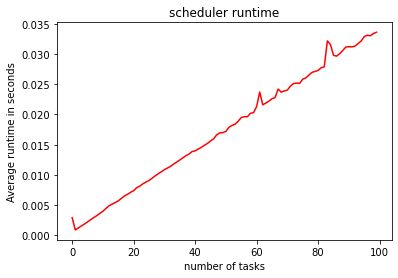

In [8]:
import timeit
import matplotlib.pyplot as plt


n=100
t=10
t_times = []

for i in range(n):
    runtime = 0
    for j in range(t):
        s_start = timeit.default_timer()
        
        class_object = daily_scheduler()

        class_object.scheduler(tasks)
        
        s_stop = timeit.default_timer()
        t_time = s_stop-s_start
        
        runtime += t_time 
    t_times.append((runtime/t))


plt.plot((range(0,n,1)), t_times, color="red")
plt.title('scheduler runtime')
plt.xlabel('number of tasks')
plt.ylabel('Average runtime in seconds')
plt.show()

In [9]:
#Assert test

def priority_calculator(tasks):
    """
    a function that calculates priority value
    -----
    Input: the original tasks list with start time in index 4
    Output: the tasks list with calculated priority value in index 4
    """
    for i in tasks:
        
        priority = 0
        #if the task has a start time, 
        #it's priority value is based on start time and duration
        
        if i[4] == "none":
            i[4] = 1500
    
        if i[4] <= 24:
            i[4] = i[4] * 60
            priority += 1440- i[4]
            priority = priority / 60
            priority += 0.1*i[2]
            i[4] = priority

        #if the task doen't have a start time,
        #it's priority value is based on start time and duration

        else:
            priority += 0.1*i[2]
            i[4] = priority   
            
            
    #lopping through the list to assign dependencies priority value
    for ntask in tasks:
        #if a task is dependet on another, we add its value to the 
        #dependable + 1% of the duration
        if ntask[3]:
            dep_lst = ntask[3]
            #if a task is dependet on another, we add its value to the 
            #dependable + 1% of the duration
            for dep in dep_lst:   
                for task in tasks:
                    #finding the task with index 0 "id" = the 
                    #dependency id to update its priority
                    if task[0] == dep:
                        if task[4] < ntask[4]:
                                task[4] = 0
                        task[4] +=  ntask[4] + 0.01*ntask[2]
    for task in tasks:
        if task[4] > 90:
            tasks.remove(task)
            
    return tasks
    
 
    
    
    


test_1 = [[0, 'Wake up sleepy head', 10, [], "none"],
         [1, 'Prepare for NS111', 90, [0], "none"], 
         [2, 'NS111 class', 90, [0,1], 8],
         [3, 'Go to NTU lab',30, [0], "none"],
         [4, 'NTU lab',180,[0,3], "none"],
         [5, 'Go to elephant mountain',40,[0],"none"],
         [6, 'Sunset at elephant mountain',90,[0,5],16.5],
         [7, 'Go to Ximen night market ',60,[0],"none"],
         [8, 'Ximen night market + dinner',120,[0,7],"none"],
        ]

test_2 = [[2, 'NS111 class', 90, [0,1], 8],
         [7, 'Go to Ximen night market ',60,[0],"none"],
         [1, 'Prepare for NS111', 90, [0], "none"],
         [6, 'Sunset at elephant mountain',90,[0,5],16.5],
         [3, 'Go to NTU lab',30, [0], "none"],
         [8, 'Ximen night market + dinner',120,[0,7],"none"],
         [4, 'NTU lab',180,[0,3], "none"],
         [0, 'Wake up sleepy head', 10, [], "none"],
         [5, 'Go to elephant mountain',40,[0],"none"] 
        ]
test_3 = [[0, 'Wake up sleepy head', 10, [], "none"],
         [1, 'Prepare for CS110', 180, [0], "none"], 
         [2, 'CS110 class', 90, [0,1], 14],
         [3, 'Go to Gym',20, [0], "none"],
         [4, 'Gym',120,[0,3], "none"],
         [5, 'Prepare for CS111',90,[0],"none"],
         [6, 'CS111 class',90,[0,5],22],
         [7, 'Grocery shopping',120,[0],"none"],
         [8, 'Cooking',90,[0,7],"none"],
        ]

test_4 = [[6, 'CS111 class',90,[0,5],22],
         [1, 'Prepare for CS110', 180, [0], "none"], 
         [5, 'Prepare for CS111',90,[0],"none"],
         [2, 'CS110 class', 90, [0,1], 14],
         [4, 'Gym',120,[0,3], "none"],
         [0, 'Wake up sleepy head', 10, [], "none"],
         [7, 'Grocery shopping',120,[0],"none"],
         [3, 'Go to Gym',20, [0], "none"],
         [8, 'Cooking',90,[0,7],"none"],
        ]
    


assert priority_calculator(test_1) == [[1, 'Prepare for NS111', 90, [0], 25.9],
 [2, 'NS111 class', 90, [0, 1], 25.0],
 [3, 'Go to NTU lab', 30, [0], 19.8],
 [4, 'NTU lab', 180, [0, 3], 18.0],
 [5, 'Go to elephant mountain', 40, [0], 17.4],
 [6, 'Sunset at elephant mountain', 90, [0, 5], 16.5],
 [7, 'Go to Ximen night market ', 60, [0], 13.2],
 [8, 'Ximen night market + dinner', 120, [0, 7], 12.0]]


assert priority_calculator(test_2) == [[2, 'NS111 class', 90, [0, 1], 25.0],
 [7, 'Go to Ximen night market ', 60, [0], 13.2],
 [1, 'Prepare for NS111', 90, [0], 25.9],
 [6, 'Sunset at elephant mountain', 90, [0, 5], 16.5],
 [3, 'Go to NTU lab', 30, [0], 19.8],
 [8, 'Ximen night market + dinner', 120, [0, 7], 12.0],
 [4, 'NTU lab', 180, [0, 3], 18.0],
 [5, 'Go to elephant mountain', 40, [0], 17.4]]


assert priority_calculator(test_3) == [[1, 'Prepare for CS110', 180, [0], 19.9],
 [2, 'CS110 class', 90, [0, 1], 19.0],
 [3, 'Go to Gym', 20, [0], 13.2],
 [4, 'Gym', 120, [0, 3], 12.0],
 [5, 'Prepare for CS111', 90, [0], 11.9],
 [6, 'CS111 class', 90, [0, 5], 11.0],
 [7, 'Grocery shopping', 120, [0], 21.9],
 [8, 'Cooking', 90, [0, 7], 9.0]]

assert priority_calculator(test_4) == [[6, 'CS111 class', 90, [0, 5], 11.0],
 [1, 'Prepare for CS110', 180, [0], 19.9],
 [5, 'Prepare for CS111', 90, [0], 11.9],
 [2, 'CS110 class', 90, [0, 1], 19.0],
 [4, 'Gym', 120, [0, 3], 12.0],
 [7, 'Grocery shopping', 120, [0], 21.9],
 [3, 'Go to Gym', 20, [0], 13.2],
 [8, 'Cooking', 90, [0, 7], 9.0]]